## Access to market / Gambia

One of the most important aspects in development is access to/from resources. For example access to  hospitals, to schools, to markets...

The idea of this project is to focus on measuring this accessibility, either by assessing the transportation road conditions (find new, missing roads, or pavement quality) or calculate the distance from the harvested fields to the ports or markets.

For example, in Gambia [1/3 of the GPD](https://en.wikipedia.org/wiki/Economy_of_the_Gambia) is agriculture, and about [75% of the population depends on crops](https://rainforests.mongabay.com/deforestation/archive/Gambia.htm).

We could, for example, calculate first the location of planted areas, and then the travel times between these and the closest villages, or port (for exports). This will give us information of the operating cost and effort to produce the harvest, and could help us calculate the impact when a particular road is upgraded, or degraded.

### Data available:

- Landsat/Copernicus Level-1 at different times.
- Satellogic Hyperspectral where available.
- Historical Hyperion where available.


## This notebook

This notebook summarizes the idea of the project, links to relevant sources and kickstarts the initial steps getting the software and data to start working


### Troubleshoot
* This is meant to work with python 3.
* If you see `Import error` it will probably work by doing `conda install <package>`
* IF you get an error `Import error: /Users/brunosan/anaconda3/lib/libgdal.20.dylib. Reason: image not found` try `conda install  libgdal=2.0.0`

## Load a satellogic hyperspectral data from the region


Hyperspectral data can easily overpower your system resources (31 bands x 1500 width x 1500 height x 16bit/pixel is a lot or memory).

The strategy here is going to be to:
* Use the RGB color raster created by Satellogic, 
* Downsample the RGB 25% (25%^2 or ~6% of the filesize) to make it easier to work with, 
* Select a small windows of interest, and 
* Finally load all the hyperspectral data for that window.

Once you know the exact computation you might want to script it for the whole raster.

# How to get the Satellogic hypersectral data

You should have received a user/password (if not, email brunosan@satellogic.com). Once in the data portal (Telluric), [this links will go straight to the search in the Catalog for Gambia](https://telluric.satellogic.com/catalog/shared/N4IgRghgzgpgthADiAXCAFgF04qKD0+A1gPYBOJAdhAHQDmMJdNArpQJYC06M7AJjAA2YGGWYD8mdoJhR8FCHyh18ADwC8wVQF8AZAE9N+vQC9NJ7SAA0IAMYxKmUagDanAIwBOAOyeADN4ArDSeAEzeAMx+EQAsAGyeEVbugYF+Mak0oRERoWmBEQAccQC6NrYsZGQOmADK9pQwAJIAIqggjQDuUBCYEQD6CLYU-RUi-XneMIV+gaG2cXyeMWDeoYoQfquFhe6Rvu4AZhD9fv0x-RHWdoLstkQwfPUOzW1oXT19gxDDJKMs40m01m80Wy1W6z4m22u32niOJzOFyuNnQJAAbqJHs9Gq1UJQWIJBDYEOxKAAFCCNQQAYUq1UcABUIGB2tUoITMFBrodpE4yAAlEgsJzclAuFwgQ4kEg4MhkzAgMqSjmIRC3ZzKkCICh8Fi2TDUOAwJVWSVSY1QTAQODILVQBowfr8U0qx2wTDOviukCfIS3Jz9I0mkplEAARxYon0qFA0tlOoV7WAAB0QJh9IgYGmUGnySRBPo6FQ01Y07YZWQ+GTerIcxK3O5CjQInEZnEm7t0pEAskYjQYn44oPPIF3LMYqFPMVlR5m63253xzEe95kqEB1FQnFQn5EnFW4FZ+4N-5Zv5QqFB35CstQuvN35t7v94fj6e-Oen1fP7fJ32ByHEcxwnKcZzNOcWzbIcl27KI13cftB2HPcQMCSdp1KUNLBsP0iXYQNg3aa4HReL1iNw90YE9F00BIlg1Q1MgKKlCg4H6C0TTomxMD+TiWNuOACNQcdPxsEhDkOD1UD8ElqI2a1Y20GwdRIPUDSItAxhNZSQBMGU4FQOIaG8GJChyCzLIsmw+DICBOlEWprUwFgxRAEgs0ab0eI8nFXnaD5egGIYRm0iZAimGY5gWJYVjWDYtm8HY9giA5jlOc5Lmuch2DoGtBD8vF3hgbogu+X5-kBCLgWisE4shaEkthVL4XSpEstw8gpEoOgADF2CEJRXFACgRS4lwwykTAZCc+UepYw5CUESlMHQFiHhjbj3KrZw6OUkbhScVxJoImbMDmugFqWla1q2jaWPIARmL2qwDrG46eNOmBZrJS6tsWokbvWmBNpAbKduesHtBKbQgA).

From there, select an image, below we chose [`257e8052c6d94b72ada0b788173791fa`](https://telluric.satellogic.com/catalog/scene/newsat3_macro_cube_257e8052c6d94b72ada0b788173791fa_0_4_3) want and download it.

Notice: A whole scene set weights roughly *3Gb* compressed.

![](telluric_search.png)

In [1]:
import os
import numpy as np

hypercube_folder="./data/satellogic/macro/2018-02-25_143937_telluric_catalog_set_257e80_gUflxSO/newsat3_macro_cube_257e8052c6d94b72ada0b788173791fa_0_4_3/rasters/"
files=os.listdir(hypercube_folder) 

rgb_file=[x for x in files if 'rgb' in x][0]
hfiles=np.sort([x for x in files if x[-6:]=='nm.tif'])

print("RGB file: %s. Number of Spectral bands: %i" % (rgb_file,len(hfiles)))
print(files)

RGB file: rgb_enhanced.tif. Number of Spectral bands: 30
['banjul.tif', 'HyperCube_550_nm.tif', 'HyperCube_730_nm.tif', 'HyperCube_595_nm.tif', 'HyperCube_720_nm.tif', 'HyperCube_827_nm.tif', 'rgb_enhanced.tif', 'HyperCube_616_nm.tif', 'HyperCube_608_nm.tif', 'HyperCube_452_nm.tif', 'HyperCube_700_nm.tif', 'HyperCube_690_nm.tif', 'HyperCube_790_nm.tif', 'HyperCube_780_nm.tif', 'HyperCube_680_nm.tif', 'HyperCube_475_nm.tif.aux.xml', 'HyperCube_570_nm.tif', 'HyperCube_462_nm.tif', 'HyperCube_710_nm.tif', 'HyperCube_800_nm.tif', 'HyperCube_740_nm.tif', 'HyperCube_516_nm.tif', 'HyperCube_475_nm.tif', 'HyperCube_530_nm.tif', 'HyperCube_810_nm.tif', 'HyperCube_488_nm.tif', 'resampled_rgb.tif', 'HyperCube_750_nm.tif', 'HyperCube_502_nm.tif', 'HyperCube_770_nm.tif', 'HyperCube_670_nm.tif', 'HyperCube_820_nm.tif', 'HyperCube_582_nm.tif', 'HyperCube_760_nm.tif']


In [2]:
import rasterio
import numpy as np
from pprint import pprint

path = hypercube_folder+rgb_file
with rasterio.open(path) as src:
    array = src.read()

stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})
print("File: ",path)
pprint(stats)


File:  ./data/satellogic/macro/2018-02-25_143937_telluric_catalog_set_257e80_gUflxSO/newsat3_macro_cube_257e8052c6d94b72ada0b788173791fa_0_4_3/rasters/rgb_enhanced.tif
[{'max': 255, 'mean': 57.63533623945361, 'median': 0.0, 'min': 0},
 {'max': 255, 'mean': 59.979174784728, 'median': 0.0, 'min': 0},
 {'max': 255, 'mean': 58.489598013690475, 'median': 0.0, 'min': 0}]


In [3]:
dataset = rasterio.open(path)
print("Data types:",{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)})
print("Bounds:",dataset.bounds)
print("CRS:",dataset.crs)

Data types: {1: 'uint8', 2: 'uint8', 3: 'uint8'}
Bounds: BoundingBox(left=-1946411.888728943, bottom=1301198.517701855, right=-1659148.698119447, top=1597809.3864592456)
CRS: CRS({'init': 'epsg:3857'})


In [4]:
#Resample to make smaller
from rasterio.warp import Affine,reproject,Resampling

resampled_path = hypercube_folder+'resampled_rgb.tif'
resample_factor=0.25 #(1/4 on the side, typically 1/4^2 reduction is filesize)

with rasterio.drivers(CHECK_WITH_INVERT_PROJ=True):
    with rasterio.open(path) as src:
        profile = src.profile

        # Calculate the ideal dimensions and transformation in the new crs
        aff = dataset.affine
        dst_affine=Affine(aff[0] / resample_factor, aff[1], aff[2],
                aff[3], aff[4] / resample_factor, aff[5])
        dst_width=int(src.width*resample_factor)
        dst_height=int(src.height*resample_factor)

        # update the relevant parts of the profile
        profile.update({
            'crs': src.crs,
            'transform': dst_affine,
            'affine': dst_affine,
            'width': dst_width,
            'height': dst_height
        })

        # Reproject and write each band
        with rasterio.open(resampled_path, 'w', **profile) as dst:
            for i in range(1, src.count + 1):
                src_array = src.read(i)
                dst_array = np.empty((dst_height, dst_width), dtype='uint8')

                reproject(
                    # Source parameters
                    source=src_array,
                    src_crs=src.crs,
                    src_transform=src.affine,
                    # Destination paramaters
                    destination=dst_array,
                    dst_transform=dst_affine,
                    dst_crs=src.crs,
                    # Configuration
                    resampling=Resampling.nearest,
                    num_threads=4)

                dst.write(dst_array, i)

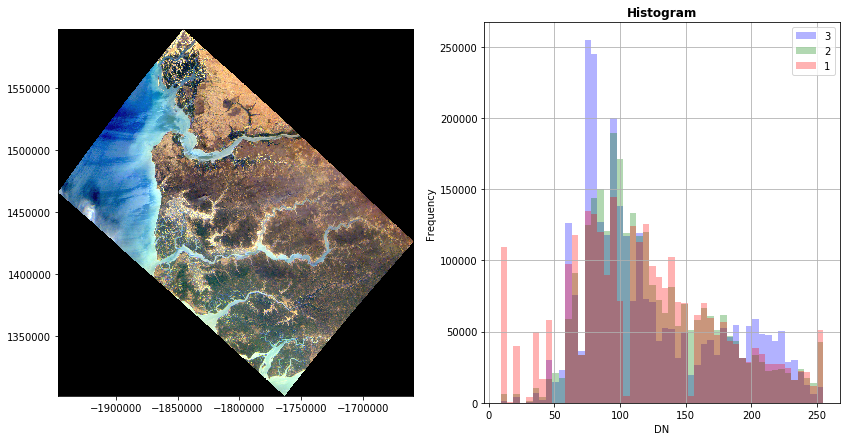

In [5]:
#quick overall plot
%matplotlib inline

from matplotlib import pyplot
from rasterio.plot import show
from rasterio.plot import show_hist

with rasterio.open(resampled_path) as resampled:
 fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
 show(resampled, ax=axrgb)
 show_hist(resampled, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
 pyplot.show()

In [6]:
#Plot the subregion to focus on, around the capital of Gambia, Banjul. 
import fiona
import rasterio
from rasterio.mask import mask

roi_path=hypercube_folder+"banjul.tif"
#to mask the region we need both images in the same CRS
with fiona.open("banjul-3857.geojson", "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]

#we use the full resolution
with rasterio.open(path) as src:
    out_image, out_transform = mask(src, geoms, crop=True)
    out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(roi_path, "w", **out_meta) as dest:
 dest.write(out_image)

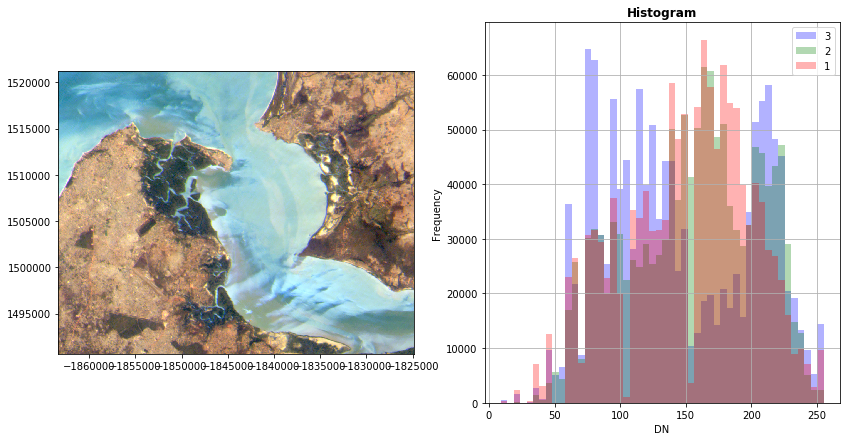

In [7]:
with rasterio.open(roi_path) as resampled:
 fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
 show(resampled, ax=axrgb)
 show_hist(resampled, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
 pyplot.show()

In [ ]:
#Read ALL bands, 
# mask them into the ROI and 
# save them into a single multiband cube

roi_path=hypercube_folder+"banjul.tif"


#to mask the region we need both images in the same CRS
with fiona.open("banjul-3857.geojson", "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]
    
max_cast=45000
min_cast=0

with rasterio.open(hypercube_folder+hfiles[0]) as src:
    out_image, out_transform = mask(src, geoms, crop=True)
cube_dtype=np.uint8 #np.uint16 to have more spectral flux resolution.
cube=np.zeros((np.shape(out_image.data)[1], np.shape(out_image.data)[2],len(hfiles)),dtype=np.uint8)


print("Reading files...",end='')
for i in np.arange(len(hfiles[:])):
    file=hfiles[i]
    print(file,end=", "),
    with rasterio.open(hypercube_folder+file) as src:
        out_image, out_transform = mask(src, geoms, crop=True)
        if out_image.data.dtype == cube.dtype:
            cube[:,:,i]=out_image.data
        else:
            #cast to uint8, to save space
            cube[:,:,i]=((np.clip(out_image.data,min_cast,max_cast)-min_cast)/(max_cast-min_cast))*np.iinfo(cube.dtype).max
print("")

Reading files...HyperCube_452_nm.tif, HyperCube_462_nm.tif, HyperCube_475_nm.tif, HyperCube_488_nm.tif, HyperCube_502_nm.tif, HyperCube_516_nm.tif, HyperCube_530_nm.tif, HyperCube_550_nm.tif, HyperCube_570_nm.tif, 

<IPython.core.display.Javascript object>


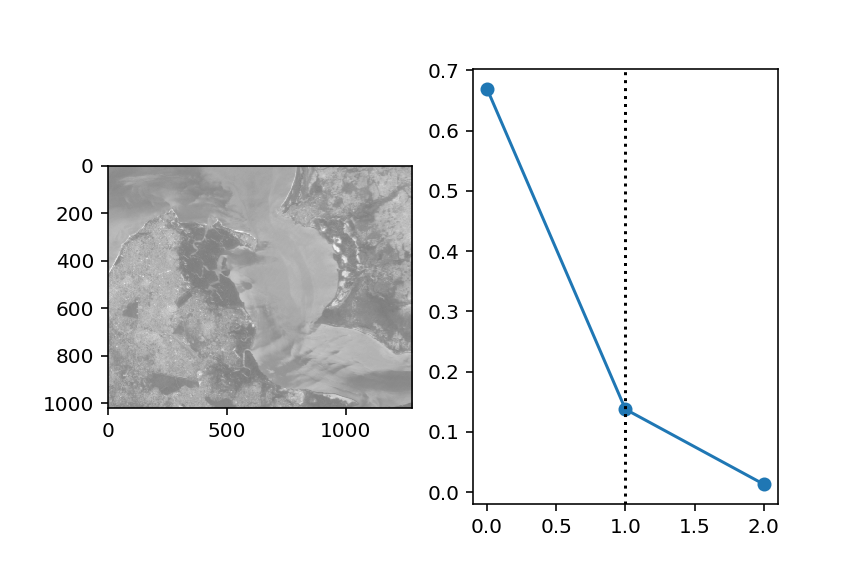

interactive(children=(IntSlider(value=15, description='Channel', max=29), Output()), _dom_classes=('widget-interact',))

In [48]:
%matplotlib notebook
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def macro_plot(c):
    wavelengths = np.asarray([450, 462, 475, 488, 502, 516, 530, 550, 570, 582, 595, 608, 616, 670, 680, 690, 700, 710, 720, 730, 740, 750, 
                                   760 , 770, 780, 790, 800, 810, 820, 827])

    i=int(c.shape[2]/2)    
    x=int(c.shape[0]/2)
    y=int(c.shape[1]/2)
    
    fig=plt.figure(0)
    im=plt.subplot(121)
    s=plt.subplot(122)

    im.cla()
    im.imshow(c[:,:,i])

    red=[620,750]
    green=[495,570]
    blue=[450,495]
    def spectra(i,x,y):
        s.cla()
        s.plot(wavelengths,c[x,y,:]/255,'o-')
        s.axvline(x=wavelengths[i],linestyle=':',color='black')
    
    #add RGB reference
        for p in [
        patches.Rectangle(
            (red[0], 0), red[1]-red[0], 1,
            alpha=.1,Color='red'
        ),
        patches.Rectangle(
            (green[0], 0), green[1]-green[0], 1,
            alpha=.1,Color='green'
        ),
        patches.Rectangle(
            (blue[0], 0), blue[1]-blue[0], 1,
            alpha=.1,Color='blue'
        ),
    ]:
            s.add_patch(p)
        plt.show()

    def onclick(event):
        y=int(event.xdata)
        x=int(event.ydata)
        i=i_slider.value
        spectra(i,x,y)
    im.figure.canvas.mpl_connect('button_press_event', onclick)
    

    def spectrogram(i):
        im.imshow(c[:,:,i], cmap='gray')
        spectra(i,x,y)

    spectrogram(i)
    i_slider = widgets.IntSlider(min=0,
                             max=c.shape[2]-1,
                             step=1,
                             value=c.shape[2]/2,
                             description='Channel')
    interact(spectrogram, i=i_slider)
macro_plot(cube)


In [10]:
##Check for image shifts (i vs i+1). Some images could have inter-channel spatial drift
##If found shift to align

from skimage.feature import register_translation

for i in np.arange(len(hfiles[:])-1):
    shift, error, diffphase = register_translation(cube[920:1020,320:420,15], cube[920:1020,320:420,i],1)
    print(i,shift)
print("")


0 [ 0. -3.]
1 [ 0. -3.]
2 [ 0. -2.]
3 [ 0. -1.]
4 [ 0. -1.]
5 [ 0. -1.]
6 [ 0. -1.]
7 [ 0. -1.]
8 [ 0. -1.]
9 [ 0. -1.]
10 [ 0. -1.]
11 [ 0. -1.]
12 [ 0. -1.]
13 [0. 0.]
14 [0. 0.]
15 [0. 0.]
16 [0. 0.]
17 [0. 0.]
18 [0. 0.]
19 [0. 0.]
20 [0. 0.]
21 [0. 0.]
22 [0. 0.]
23 [0. 0.]
24 [0. 1.]
25 [0. 1.]
26 [0. 2.]
27 [0. 2.]
28 [0. 0.]



# Land classifier

The following section points into ways one can classify  a scence without ground data.
For more information checkout http://www.spectralpython.net/algorithms.html

uses a simple k-means

In [116]:
from spectral import *
k=30
loops=10
(m, c) = kmeans(cube, k, loops)

Initializing clusters along diagonal of N-dimensional bounding box.
Iteration 1...  0.Iteration 1...1299464 pixels reassigned.
Iteration 2...  0.Iteration 2...715895 pixels reassigned.
Iteration 3...  0.Iteration 3...258853 pixels reassigned.
Iteration 4...  0.Iteration 4...116861 pixels reassigned.
Iteration 5...  0.Iteration 5...85716 pixels reassigned.
Iteration 6...  0.Iteration 6...67827 pixels reassigned.
Iteration 7...  0.Iteration 7...58017 pixels reassigned.
Iteration 8...  0.Iteration 8...51903 pixels reassigned.
Iteration 9...  0.Iteration 9...46949 pixels reassigned.
Iteration 10...  0.0Iteration 10...42146 pixels reassigned.
kmeans terminated with 17 clusters after 10 iterations.


<IPython.core.display.Javascript object>


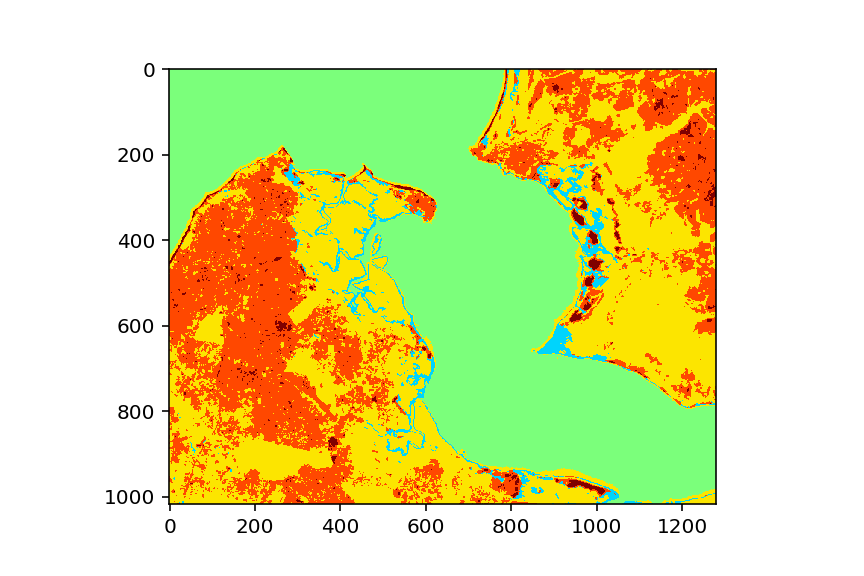

<function matplotlib.pyplot.colorbar>

In [117]:
import matplotlib.cm as cm
km=plt.figure(4)

base = plt.cm.get_cmap(cm.jet)
cmap=base.from_list('', base(np.linspace(0, 1, k)), N)

plt.imshow(m,cmap=cmap)
plt.colorbar

<IPython.core.display.Javascript object>


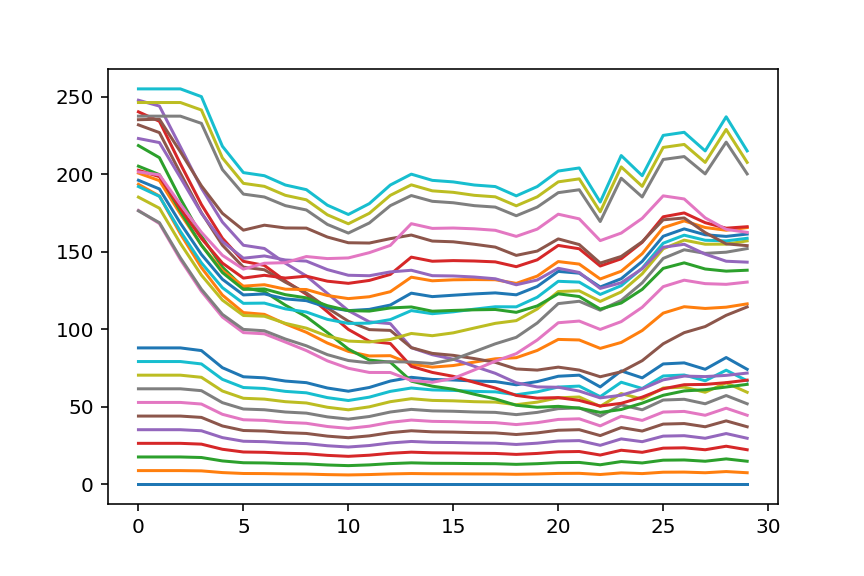

/Users/brunosan/anaconda3/envs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
import pylab
f=pylab.figure()
f.hold(1)
for i in range(c.shape[0]):
    pylab.plot(c[i])
    
pylab.show()

<IPython.core.display.Javascript object>


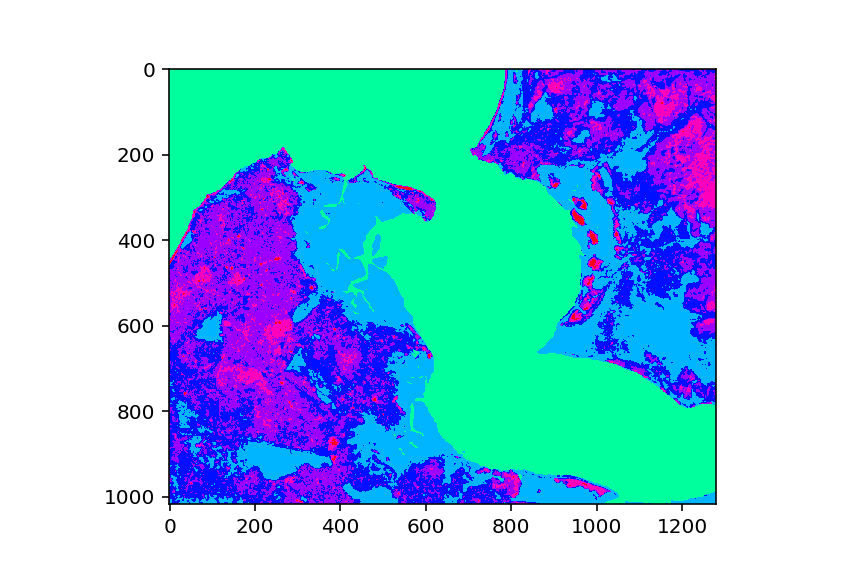

In [59]:
#PCA
#When doing principal components, the more components, the less information, hence they decay

pc = principal_components(cube)

#COV shows the correlation among wavelengths, which, as you can see is highest in the Infrared  (>20)
#(most probably for the amount of water in the scene), which has low reflectance in that range.

v = imshow(pc.cov)

In [60]:
#Helper function to plot 3D cubes
def spectral_plot(c):
 
    i=int(c.shape[2]/2)    
    x=int(c.shape[0]/2)
    y=int(c.shape[1]/2)
    
    fig=plt.figure(2)
    im=plt.subplot(121)
    s=plt.subplot(122)

    im.cla()
    im.imshow(c[:,:,i])

    def spectra(i,x,y):
        s.cla()
        s.plot(c[x,y,:]/255,'o-')
        s.axvline(x=i,linestyle=':',color='black')
    

    def onclick(event):
        y=int(event.xdata)
        x=int(event.ydata)
        i=i_slider.value
        spectra(i,x,y)
    im.figure.canvas.mpl_connect('button_press_event', onclick)
    

    def spectrogram(i):
        im.imshow(c[:,:,i], cmap='gray')
        spectra(i,x,y)

    spectrogram(i)
    i_slider = widgets.IntSlider(min=0,
                             max=c.shape[2]-1,
                             step=1,
                             value=c.shape[2]/2,
                             description='Channel')
    interact(spectrogram, i=i_slider)


Reducing with PCA to 99.9%, yields 14 frames.


<IPython.core.display.Javascript object>


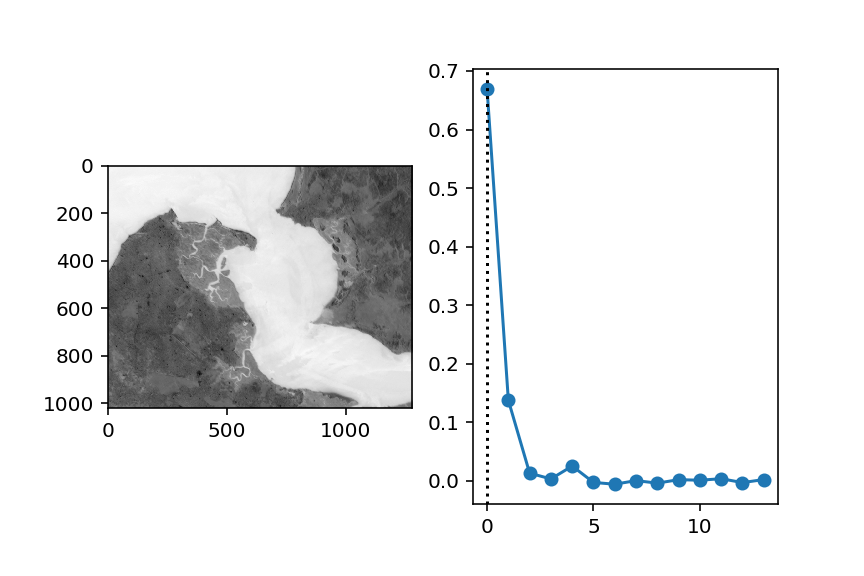

interactive(children=(IntSlider(value=7, description='Channel', max=13), Output()), _dom_classes=('widget-interact',))

In [58]:
fraction=0.999

pc_0999 = pc.reduce(fraction=fraction)

# How many eigenvalues are left?

print("Reducing with PCA to %2.1f%% of original image variance, yields %i frames."%(fraction*100,len(pc_0999.eigenvalues)))

img_pc = pc_0999.transform(cube)



spectral_plot(img_pc)